# 教師あり学習（サポートベクトルマシン）
* 本実習では、教師あり学習のうち、サポートベクトルマシン（SVM: Support Vector Machine）を使います。
   * 機械学習とは→ [コンピューターに"学習"させる](http://image.slidesharecdn.com/deepvision-141031063609-conversion-gate01/95/deep-learning-4-638.jpg) 
   * [サポートベクターマシン](http://image.slidesharecdn.com/shen2007-120927221259-phpapp01/95/proteinprotein-interaction-prediction-8-728.jpg) ・ [サポートベクターマシンとは](http://qiita.com/pesuchin/items/c55f40b69aa1aec2bd19)

In [12]:
#（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [13]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート

In [14]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [15]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

## スイス銀行紙幣データ
<a href="DataForPractice2017.ipynb">「スイス銀行紙幣データ」</a>を例に説明します。これは、本物のスイス紙幣の紙幣（真札）と偽札の横幅長などの測定値のデータです。果たして、真札と偽札とを機械学習で区別できるでしょうか？

まず、データの読み込みを行います。データの読み込みについて不明点がある場合は<a href="ReadingCSV.ipynb" target="_blank">タブ区切りデータ、コンマ区切りデータ等の読み込み</a>を復習してください。

In [16]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/sbnote_dataJt.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'sbnote_dataJt.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'sbnote_dataJt.txt') # Python 3 の場合

('sbnote_dataJt.txt', <http.client.HTTPMessage at 0x115c0e710>)

In [17]:
df = pd.read_csv('sbnote_dataJt.txt', sep='\t', index_col=0) # データの読み込み

In [18]:
df

,length,left,right,bottom,top,diagonal,class
Note,,,,,,,
1,214.8,131.0,131.1,9.0,9.7,141.0,0
2,214.6,129.7,129.7,8.1,9.5,141.7,0
3,214.8,129.7,129.7,8.7,9.6,142.2,0
4,214.8,129.7,129.6,7.5,10.4,142.0,0
5,215.0,129.6,129.7,10.4,7.7,141.8,0
6,215.7,130.8,130.5,9.0,10.1,141.4,0
7,215.5,129.5,129.7,7.9,9.6,141.6,0
8,214.5,129.6,129.2,7.2,10.7,141.7,0
9,214.9,129.4,129.7,8.2,11.0,141.9,0


"class" が札の真偽を表します(0: 真札, 1:偽札)

次に、散布図行列を作成して変数間の関係を眺めます。散布図行列について不明点がある場合は<a href="ScatterMatrix.ipynb" target="_blank">散布図行列</a>を復習してください。

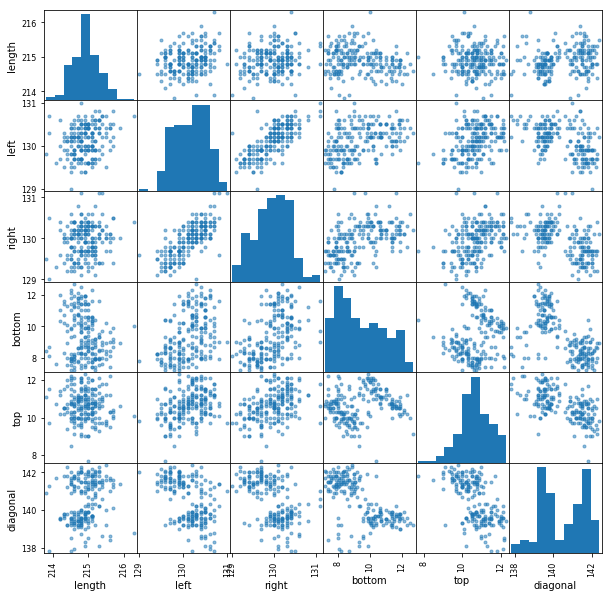

In [19]:
# 散布図行列
plotting.scatter_matrix(df[list(df.columns[:-1])], figsize=(10, 10)) 
plt.show()

上図から、なんとなく２つのグループに分かれそうだということが分かりますね。そのグループは、真札・偽札の違いと対応しているのでしょうか？それを確認するため、カラーコードを用いて、"class"に基づいて散布図行列を色分けします。
* カラーコードが分からない人は右記リンク参照→ [カラーコード表](http://www5.plala.or.jp/vaio0630/hp/c_code.htm)・[カラーコード](http://www.finitojapan.com/cltable.html)

ValueError: Supply a 'c' kwarg or a 'color' kwarg but not both; they differ but their functionalities overlap.

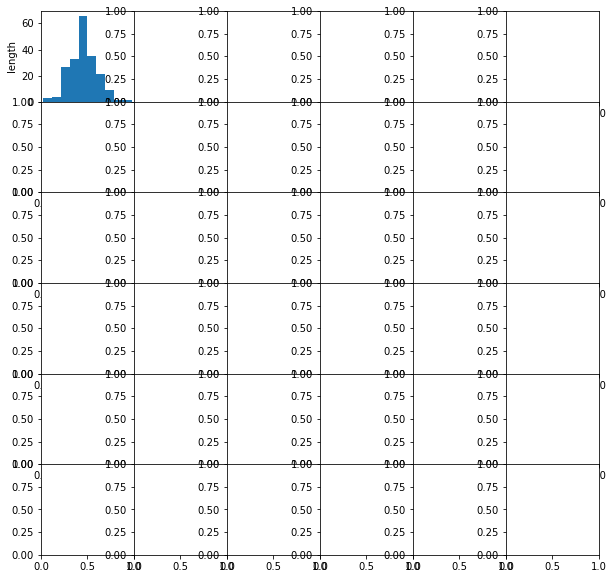

In [20]:
# 色分けした散布図行列
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
plotting.scatter_matrix(df[list(df.columns[:6])], figsize=(10, 10), color=colors) 
plt.show()

上の散布図行列から、真札と偽札は特徴の異なる２つのグループに分けられそうだと分かります。どのようにすれば分けられるでしょうか？
* __変数を１つだけ用いて分ける__
    * 変数「length」を単独で用いただけでは、真札と偽札の区別は難しそうです。
    * 変数「diagonal」を使えば、それ単独でも真札と偽札の区別はけっこう高い精度でできそうです。
* __変数を２つ組み合わせて用いる__
    * 変数「top」と「length」のプロットから、これら２つの変数の組み合わせだけから真札と偽札の区別は難しそうです。
    * 変数「top」単独では真札と偽札の区別は難しそうですが、「top」と「bottom」を組み合わせることで、真札と偽札の区別ができそうです。

それでは、もっと多くの変数を組み合わせればどうなるでしょうか？それを見るために、主成分分析をしてみましょう。主成分分析について不明点がある場合は<a href="PCA2017.ipynb" target="_blank">主成分分析</a>を復習してください。

In [ ]:
# 行列の正規化
dfs = df.iloc[:, :-1].apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

In [ ]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

上の主成分分析の結果を見ても、大きく２つのグループに分かれることがわかりました。これらのグループは真札と偽札とに対応してるのでしょうか？色分けをして確認してみましょう。

In [ ]:
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=colors)
plt.grid()
plt.show()

これまでの解析で、真札と偽札ははっきりとした特徴の違いのある２つのグループに分かれることが分かりました。では次に、これを自動的に区別するための機械学習モデルを作りましょう。

### データの整形
Nをサンプル数（ここでは、お札の数）、Mを特徴量の数（ここでは、横幅長などの測定値の種類の数）とする。

* __feature_names__ : 特徴量の名前（M次元のベクトル。ここでは、「横幅長」など。）
* __target_names__ : 目的変数の名前（目的となるグループの名前。ここでは「真札」と「偽札」。）
* __sample_names__ : サンプルの名前（N次元のベクトル。ここでは、お札のID番号。）
* __data__ : 説明変数（N行M列の行列。ここでは、それぞれのお札の横幅長などの測定値。）
* __target__ : 目的変数（N次元のベクトル。ここでは、それぞれのお札が真札か偽札かを表す。）

ここでの機械学習の目的は、__data__から__target__を予測する問題を解くことである。

先ほど読み込んだデータを、上記の形式に合わせてPandasを用いて整形します。不明点がある場合は<a href="UsingNumpyAndPandas.ipynb" target="_blank">Numpy と Pandas を用いた演算</a>を復習してください。

In [ ]:
feature_names = df.columns[:-1]
target_names = list(set(df.iloc[:, -1]))
sample_names = df.index
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

### データの分割
交差検定をするため、データを学習用とテスト用に分割します。
* __train_data__ :  説明変数（学習用）
* __test_data__ : 説明変数（テスト用）
* __train_target__ : 目的変数（学習用）
* __test_target__ :  目的変数（テスト用）

交差検定 (cross-validation) とは → [交差検定](http://image.slidesharecdn.com/scikit-learn-141201042924-conversion-gate01/95/scikit-learn-15-638.jpg)
* 現在取得できているデータを「学習用セット」と「テスト用（評価用）セット」に分け、「学習用セット」だけを使って予測モデルを構築し、「テスト用セット」を使ってモデルの性能を評価します。

In [ ]:
from sklearn import model_selection as ms
train_data, test_data, train_target, test_target = ms.train_test_split(data, target, test_size=0.5)

train_test_splitを用いると、dataとtargetの対応関係を保った上で、シャッフル（サンプルの順番をランダムに入れかえ）し、学習セットと評価セットに分割できます。

上記で、test_size=0.5 とすると、train:test = 5:5 になります。つまり、半分のデータだけを使って学習して予測モデルを構築し、その予測モデルを用いて残り半分のデータを予測し、答えあわせをして、構築した予測モデルの性能を評価することになります。

仮に test_size=0.2 に変更すると、train:test = 8:2 になります。つまり、80%のデータを使って学習して予測モデルを構築し、その予測モデルを用いて残り20%のデータを予測し、答えあわせをして、構築した予測モデルの性能を評価することになります。

どちらのほうが予測性能が高くなるでしょうか？見かけ上、後者です。test_sizeを小さくすればするほど、見かけ上の予測性能が向上します。ところがそのような予測モデルは、与えられた学習用セットだけに過剰に適合し、汎化能力に欠ける予測モデルになる可能性があります（そのような状態を「過剰適合」または「過学習」「オーバーフィッティング」と言います）。

では、test_sizeは大きいほうが良いのでしょうか？大きくし過ぎると、学習データが小さくなります。そのため性能が落ちたり、場合によっては、あるtarget_nameを持つサンプルの数が少なくなりすぎてそのtarget_nameの予測ができなくなったりします。

test_sizeをどのくらいにするのが最適か、データの中身を見ながらケースバイケースで決める必要があります。

念のため、分割したデータの中身を確認しましょう。train_dataとtest_dataで、順番がきちんとシャッフルされていて、どちらも意図した通りのデータサイズになっていること（たとえばtest_size=0.5としたならtrain_dataとtest_dataのサイズが1:1になっていること）を確認してください。

In [ ]:
# 説明変数（学習用）
train_data

In [ ]:
# 説明変数（テスト用）
test_data

同様に、目的変数のほうも確認しましょう。確認すべきことは、
* train_target と test_target が N次元のベクトル（N行１列の行列）になっていること
* train_target と train_data のサンプルの数（N）と順序が揃っていること
* test_target と test_data のサンプルの数（N）と順序が揃っていること

In [ ]:
# 目的変数（学習用）
pd.DataFrame(train_target)

In [ ]:
# 目的変数（テスト用）
pd.DataFrame(test_target)

以上で、サポートベクトルマシン（SVM）などの教師あり機械学習法を使うためのデータ整備ができました。

### SVMで学習・予測
学習用データ（ __train_data__ と __train_target__ ) の関係を学習して、テスト用データ( __test_data__ )から正解( __test_target__ ) を予測する、という流れになります。

まずハイパーパラメータの設定を行います。ハイパーパラメータとは、簡単に言えば、機械学習を行う際に人間が予め設定しておかなければいけないパラメータのことです。

In [ ]:
# 様々なパラメータ（ハイパーパラメータという）で学習し、予測性能の最も良いモデルを選択する。
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'],     'C': [1, 10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]},      
    {'kernel': ['poly'],'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5]}]

上のような設定を行えば、（パラメータの細かい意味は今は無視してください）
* linearカーネルSVMでC=1
* linearカーネルSVMでC=10
* linearカーネルSVMでC=100
* linearカーネルSVMでC=1000
* rbfカーネルSVMでC=1,gamma=1e-2
* rbfカーネルSVMでC=1,gamma=1e-3
* rbfカーネルSVMでC=1,gamma=1e-4
* rbfカーネルSVMでC=10,gamma=1e-2
* rbfカーネルSVMでC=10,gamma=1e-3
* rbfカーネルSVMでC=10,gamma=1e-4
* rbfカーネルSVMでC=100,gamma=1e-2
* rbfカーネルSVMでC=100,gamma=1e-3
* rbfカーネルSVMでC=100,gamma=1e-4
* rbfカーネルSVMでC=1000,gamma=1e-2
* rbfカーネルSVMでC=1000,gamma=1e-3
* rbfカーネルSVMでC=1000,gamma=1e-4
* polynominalカーネルSVMでC=1,degree=2
* polynominalカーネルSVMでC=1,degree=3
* polynominalカーネルSVMでC=1,degree=4
* polynominalカーネルSVMでC=1,degree=5
* polynominalカーネルSVMでC=10,degree=2
* polynominalカーネルSVMでC=10,degree=3
* polynominalカーネルSVMでC=10,degree=4
* polynominalカーネルSVMでC=10,degree=5
* polynominalカーネルSVMでC=100,degree=2
* polynominalカーネルSVMでC=100,degree=3
* polynominalカーネルSVMでC=100,degree=4
* polynominalカーネルSVMでC=100,degree=5
* polynominalカーネルSVMでC=1000,degree=2
* polynominalカーネルSVMでC=1000,degree=3
* polynominalカーネルSVMでC=1000,degree=4
* polynominalカーネルSVMでC=1000,degree=5

以上の計３２通りのSVMで計算を行い、最も予測性能の高いものを選択することになります。本来はこのように非常に多数のハイパーパラメータを設定し最良の予測モデルを探索するのですが、たいへん長い計算時間を必要とすることがあります。時間の制約のため、本実習では、ハイパーパラメータの数を次のように減らして良いということにします。

In [ ]:
# 様々なパラメータ（ハイパーパラメータという）で学習し、予測性能の最も良いモデルを選択する。
parameters = [
    {'kernel': ['linear'], 'C': [1]},
    {'kernel': ['rbf'],     'C': [1], 'gamma': [1e-2]},      
    {'kernel': ['poly'],'C': [1], 'degree': [2]}]

これで、

* linearカーネルSVMでC=1
* rbfカーネルSVMでC=1,gamma=1e-2
* polynominalカーネルSVMでC=1,degree=2

以上の計３通りのSVMで計算を行い、最も予測性能の高いものを選択することになります。では実際に計算してみましょう。

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
from sklearn import grid_search

# train_data を使って、SVM による学習を行う
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=2).fit(train_data, train_target)

# 分離性能の最も良かったモデルが何だったか出力する
print(gs.best_estimator_)

# モデル構築に使わなかったデータを用いて、予測性能を評価する
pred_target = gs.predict(test_data)
print ("Accuracy_score:{0}".format(accuracy_score(test_target, pred_target)))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

複数のハイパーパラメータの中で、上記に記述されているものが最良だったということになります。学習セットと評価セットの分割はランダムに行われるので、毎回違った結果が出ますが、Accuracy score （正解率）は非常に高い（おおむね0.99）ことが分かります。この問題は、SVMで解くには簡単すぎたようです。

予測精度はAccuracy_score:で表記された数値の通りですが、もう少し具体的に予測結果の中身を検討してみましょう。

In [ ]:
# 予測結果と、本当の答えを比較する
df = pd.DataFrame(columns=['test', 'pred'])
df['test'] = test_target # 本当の答え
df['pred'] = pred_target # 予測された答え
df.T

In [ ]:
# 予測結果を本当の答えの比較を、混合行列（confusion matrix）で表現する
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, pred_target)
pd.DataFrame(cm)

対角線上にある数字が「正解」の個数ということになります。行列中の数字を眺めるのも良いですが、カラーマップに変換すれば見やすくなることもあります。やってみましょう。

In [ ]:
# 混合行列（confusion matrix）をカラーマップで見やすくする
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

以上です。

## あやめのデータ
続いて、<a href="DataForPractice2017.ipynb">「あやめのデータ」</a>を例に説明します。これは、３種類のあやめの花弁の長さなどの測定値のデータです。果たして、これらの測定値から３種類のあやめを区別できるでしょうか？

以下の計算は、扱うデータこそ違いますが、ほとんど同じ操作で行っています。

まず、データの読み込みを行います。データの読み込みについて不明点がある場合は<a href="ReadingCSV.ipynb" target="_blank">タブ区切りデータ、コンマ区切りデータ等の読み込み</a>を復習してください。

In [ ]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'iris.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'iris.txt') # Python 3 の場合

In [ ]:
df = pd.read_csv('iris.txt', sep='\t', index_col=0) # データの読み込み

In [ ]:
df

"Species" が、あやめの種名を表します。

次に、散布図行列を作成して変数間の関係を眺めます。散布図行列について不明点がある場合は<a href="ScatterMatrix.ipynb" target="_blank">散布図行列</a>を復習してください。

In [ ]:
# 散布図行列
plotting.scatter_matrix(df[list(df.columns[:-1])], figsize=(10, 10)) 
plt.show()

上図から、なんとなく２つのグループ（大きなグループと小さなグループ）に分かれそうだということが分かりますね。そのグループは、種名の違いと対応しているのでしょうか？それを確認するため、カラーコードを用いて、"Species"に基づいて散布図行列を色分けします。
* カラーコードが分からない人は右記リンク参照→ [カラーコード表](http://www5.plala.or.jp/vaio0630/hp/c_code.htm)・[カラーコード](http://www.finitojapan.com/cltable.html)

In [ ]:
# 色分けした散布図行列
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
plotting.scatter_matrix(df[list(df.columns[:6])], figsize=(10, 10), color=colors) 
plt.show()

上の散布図行列から、小さなグループは１つの種から、大きなグループは２つの種から成るということが言えそうです。小さなグループと大きなグループの区別は簡単そうですね。大きなグループの２種は、どのようにすれば分けられるでしょうか？

Sepal.Length, Sepal.Width, Petal.Length, Petal.Widthのどの変数でも、１つだけ単独で用いるだけでもそこそこの分離性能は出せそうです。それでは、これらの変数を組み合わせればどうなるでしょうか？それを見るために、主成分分析をしてみましょう。主成分分析について不明点がある場合は<a href="PCA2017.ipynb" target="_blank">主成分分析</a>を復習してください。

In [ ]:
# 行列の正規化
dfs = df.iloc[:, :-1].apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

In [ ]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

上の主成分分析の結果を見ても、大きいグループと小さいグループに分かれることがわかりました。これらのグループと種名の関係はどうなっているでしょうか？色分けをして確認してみましょう。

In [ ]:
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=colors)
plt.grid()
plt.show()

これまでの解析で、あやめははっきりとした特徴の違いのある大小２つのグループに分かれること、そして小グループは１つの種と、大グループは２つの種に対応することが分かりました。そのうち大グループの２つの種も、比較的簡単に区別できそうです。では次に、これを自動的に区別するための機械学習モデルを作りましょう。

### データの整形
Nをサンプル数（ここでは、あやめの花の数）、Mを特徴量の数（ここでは、花弁の長さなどの測定値の種類の数）とする。

* __feature_names__ : 特徴量の名前（M次元のベクトル。ここでは、「花弁の長さ」など。）
* __target_names__ : 目的変数の名前（目的となるグループの名前。ここでは種名。）
* __sample_names__ : サンプルの名前（N次元のベクトル。ここでは、あやめの花のID番号。）
* __data__ : 説明変数（N行M列の行列。ここでは、それぞれの花弁の長さなどの測定値。）
* __target__ : 目的変数（N次元のベクトル。ここでは、それぞれの花の種名が何かを表す。）

ここでの機械学習の目的は、__data__から__target__を予測する問題を解くことである。

先ほど読み込んだデータを、上記の形式に合わせてPandasを用いて整形します。不明点がある場合は<a href="UsingNumpyAndPandas.ipynb" target="_blank">Numpy と Pandas を用いた演算</a>を復習してください。

In [ ]:
feature_names = df.columns[:-1]
target_names = list(set(df.iloc[:, -1]))
sample_names = df.index
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

### データの分割
交差検定をするため、データを学習用とテスト用に分割します。
* __train_data__ :  説明変数（学習用）
* __test_data__ : 説明変数（テスト用）
* __train_target__ : 目的変数（学習用）
* __test_target__ :  目的変数（テスト用）

交差検定 (cross-validation) とは → [交差検定](http://image.slidesharecdn.com/scikit-learn-141201042924-conversion-gate01/95/scikit-learn-15-638.jpg)
* 現在取得できているデータを「学習用セット」と「テスト用（評価用）セット」に分け、「学習用セット」だけを使って予測モデルを構築し、「テスト用セット」を使ってモデルの性能を評価します。

In [ ]:
from sklearn import cross_validation as cv
train_data, test_data, train_target, test_target = cv.train_test_split(data, target, test_size=0.5)

train_test_splitを用いると、dataとtargetの対応関係を保った上で、シャッフル（サンプルの順番をランダムに入れかえ）し、学習セットと評価セットに分割できます。

上記で、test_size=0.5 とすると、train:test = 5:5 になります。つまり、半分のデータだけを使って学習して予測モデルを構築し、その予測モデルを用いて残り半分のデータを予測し、答えあわせをして、構築した予測モデルの性能を評価することになります。

仮に test_size=0.2 に変更すると、train:test = 8:2 になります。つまり、80%のデータを使って学習して予測モデルを構築し、その予測モデルを用いて残り20%のデータを予測し、答えあわせをして、構築した予測モデルの性能を評価することになります。

どちらのほうが予測性能が高くなるでしょうか？見かけ上、後者です。test_sizeを小さくすればするほど、見かけ上の予測性能が向上します。ところがそのような予測モデルは、与えられた学習用セットだけに過剰に適合し、汎化能力に欠ける予測モデルになる可能性があります（そのような状態を「過剰適合」または「過学習」「オーバーフィッティング」と言います）。

では、test_sizeは大きいほうが良いのでしょうか？大きくし過ぎると、学習データが小さくなります。そのため性能が落ちたり、場合によっては、あるtarget_nameを持つサンプルの数が少なくなりすぎてそのtarget_nameの予測ができなくなったりします。

test_sizeをどのくらいにするのが最適か、データの中身を見ながらケースバイケースで決める必要があります。

念のため、分割したデータの中身を確認しましょう。train_dataとtest_dataで、順番がきちんとシャッフルされていて、どちらも意図した通りのデータサイズになっていること（たとえばtest_size=0.5としたならtrain_dataとtest_dataのサイズが1:1になっていること）を確認してください。

In [ ]:
# 説明変数（学習用）
train_data

In [ ]:
# 説明変数（テスト用）
test_data

同様に、目的変数のほうも確認しましょう。確認すべきことは、
* train_target と test_target が N次元のベクトル（N行１列の行列）になっていること
* train_target と train_data のサンプルの数（N）と順序が揃っていること
* test_target と test_data のサンプルの数（N）と順序が揃っていること

In [ ]:
# 目的変数（学習用）
pd.DataFrame(train_target)

In [ ]:
# 目的変数（テスト用）
pd.DataFrame(test_target)

以上で、サポートベクトルマシン（SVM）などの教師あり機械学習法を使うためのデータ整備ができました。

### SVMで学習・予測
学習用データ（ __train_data__ と __train_target__ ) の関係を学習して、テスト用データ( __test_data__ )から正解( __test_target__ ) を予測する、という流れになります。

まずハイパーパラメータの設定を行います。ハイパーパラメータとは、簡単に言えば、機械学習を行う際に人間が予め設定しておかなければいけないパラメータのことです。

In [ ]:
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'],     'C': [1, 10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]},      
    {'kernel': ['poly'],'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5]}]

上のような設定を行えば、（パラメータの細かい意味は今は無視してください）
* linearカーネルSVMでC=1
* linearカーネルSVMでC=10
* linearカーネルSVMでC=100
* linearカーネルSVMでC=1000
* rbfカーネルSVMでC=1,gamma=1e-2
* rbfカーネルSVMでC=1,gamma=1e-3
* rbfカーネルSVMでC=1,gamma=1e-4
* rbfカーネルSVMでC=10,gamma=1e-2
* rbfカーネルSVMでC=10,gamma=1e-3
* rbfカーネルSVMでC=10,gamma=1e-4
* rbfカーネルSVMでC=100,gamma=1e-2
* rbfカーネルSVMでC=100,gamma=1e-3
* rbfカーネルSVMでC=100,gamma=1e-4
* rbfカーネルSVMでC=1000,gamma=1e-2
* rbfカーネルSVMでC=1000,gamma=1e-3
* rbfカーネルSVMでC=1000,gamma=1e-4
* polynominalカーネルSVMでC=1,degree=2
* polynominalカーネルSVMでC=1,degree=3
* polynominalカーネルSVMでC=1,degree=4
* polynominalカーネルSVMでC=1,degree=5
* polynominalカーネルSVMでC=10,degree=2
* polynominalカーネルSVMでC=10,degree=3
* polynominalカーネルSVMでC=10,degree=4
* polynominalカーネルSVMでC=10,degree=5
* polynominalカーネルSVMでC=100,degree=2
* polynominalカーネルSVMでC=100,degree=3
* polynominalカーネルSVMでC=100,degree=4
* polynominalカーネルSVMでC=100,degree=5
* polynominalカーネルSVMでC=1000,degree=2
* polynominalカーネルSVMでC=1000,degree=3
* polynominalカーネルSVMでC=1000,degree=4
* polynominalカーネルSVMでC=1000,degree=5

以上の計３２通りのSVMで計算を行い、最も予測性能の高いものを選択することになります。本来はこのように非常に多数のハイパーパラメータを設定し最良の予測モデルを探索するのですが、たいへん長い計算時間を必要とすることがあります。時間の制約のため、本実習では、ハイパーパラメータの数を次のように減らして良いということにします。

In [ ]:
# 様々なパラメータ（ハイパーパラメータという）で学習し、予測性能の最も良いモデルを選択する。
parameters = [
    {'kernel': ['linear'], 'C': [1]},
    {'kernel': ['rbf'],     'C': [1], 'gamma': [1e-2]},      
    {'kernel': ['poly'],'C': [1], 'degree': [2]}]

これで、

* linearカーネルSVMでC=1
* rbfカーネルSVMでC=1,gamma=1e-2
* polynominalカーネルSVMでC=1,degree=2

以上の計３通りのSVMで計算を行い、最も予測性能の高いものを選択することになります。では実際に計算してみましょう。

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
from sklearn import grid_search
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=2).fit(train_data, train_target)
print(gs.best_estimator_)
pred_target = gs.predict(test_data)
print ("Accuracy_score:{0}".format(accuracy_score(test_target, pred_target)))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

複数のハイパーパラメータの中で、上記に記述されているものが最良だったということになります。学習セットと評価セットの分割はランダムに行われるので、毎回違った結果が出ますが、Accuracy score （正解率）は非常に高い（おおむね0.96）ことが分かります。

予測精度はAccuracy_score:で表記された数値の通りですが、もう少し具体的に予測結果の中身を検討してみましょう。

In [ ]:
df = pd.DataFrame(columns=['test', 'pred'])
df['test'] = test_target
df['pred'] = pred_target
df.T

In [ ]:
# 予測結果を本当の答えの比較を、混合行列（confusion matrix）で表現する
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, pred_target)
pd.DataFrame(cm)

対角線上にある数字が「正解」の個数ということになります。行列中の数字を眺めるのも良いですが、カラーマップに変換すれば見やすくなることもあります。やってみましょう。

In [ ]:
# 混合行列（confusion matrix）をカラーマップで見やすくする
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

setosa とそれ以外は簡単に区別できますが、versicolorとvirginicaの区別は、たまに間違えることもあるようですね。

以上のように、SVMで「0か1か」のような二者択一の予測もできるし、「AかBかCか」という三択や、それ以上の分類の予測も可能です。